## Wine Analysis

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets, linear_model
import tensorflow as tf

rng = np.random

In [44]:
# Read the data and assign the attributes
data = pd.read_csv('wine.data',header=None)
data.columns = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash ', 'Magnesium','Total Phenols', \
             'Flavanoids','Nonflavanoid phenols','Proanthocyanins', 'Color Intensity','Hue', 'OD280/OD315 of diluted wines','Proline']

In [48]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
# extract explanatory and response variable. 
X = data.loc[:,'Alcohol']
Y = data.loc[:,'Ash']

# Split into training and test
X_train = X[:-50]
X_test  = X[-50:]

# Split the response variables into training/testing sets
Y_train  = Y[:-50]
Y_test   = Y[-50:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.to_frame(), Y_train.to_frame())

#Predict
regr.predict(X_test.to_frame())

# The coefficients
print('Coefficients: \n', regr.coef_)

# Mean squared error
print("Mean Squared Error: %.2f" \
      %np.mean((regr.predict(X_test.to_frame() - X_test.to_frame()) ** 2)))

Coefficients: 
 [[ 0.06466165]]
Mean Squared Error: 2.26


In [52]:
# Explain Variance
print('Variance score: %.2f' % regr.score(X_test.to_frame(), Y_test.to_frame()))

Variance score: -0.14


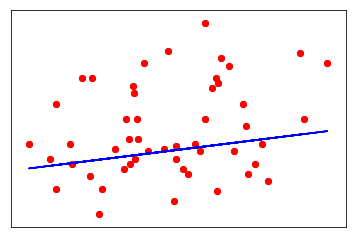

In [54]:
# Plot Outputs
plt.scatter(X_test.to_frame(),Y_test.to_frame(),color='red')
plt.plot(X_test.to_frame(), regr.predict(X_test.to_frame()), color='blue')
plt.xticks(())
plt.yticks(())
plt.show()